In [89]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)


/home/gyang/miniconda3/bin/python
3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [2]:
import mlflow

/home/gyang/miniconda3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/gyang/miniconda3/lib/python3.10/site-packages/pydantic/_internal/_config.py:321: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [7]:
import tempfile

In [8]:
import os

In [17]:
!pip install --user mlflow_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 36.5 MB/s eta 0:00:000m eta 0:00:010:01:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires pyarrow>=15.0.0, but you have pyarrow 13.0.0 which is incompatible.
apache-beam 2.59.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [20]:
from mlflow import create_experiment

In [15]:
mlflow.set_tracking_uri("http://localhost:5000")


In [35]:
with mlflow.start_run():
    mlflow.log_param("param1", 5)
    mlflow.log_metric("metric1", 0.85)

In [90]:
ls

AI/                                        Music/
airflow/                                   myfile
audit.py                                   myfile.pub
bbc-text.csv                               myfirst
best_sarca_model2.h5                       myfirst.pub
best_sarca_model.h5                        nltk_data/
bin/                                       nmt_utils.py
C5_1x-Copy1.ipynb                          password
C5_1x.ipynb                                Pictures/
catalog_industrialization_pipeline/        Public/
core.12243                                 PycharmProjects/
core.16881                                 reports/
core.26669                                 resp_x_data.csv
core.27051                                 Reverse_Email.ipynb
core.3303                                  run_artifacts/
daily-min-temperatures.csv                 sarcasm.json
data/                                      scikit_learn_data/
Data/                                      SESE model.ipynb
Desk

In [12]:
if __name__ == "__main__":
    # create a new mlflow experiment
    experiment_id = mlflow.create_experiment(
        name="testing_mlflow",
        artifact_location="mlflow-artifacts:/0",
        tags={"env": "dev", "version": "1.0.0"},
    )

    print(experiment_id)

575137661917955595


In [30]:
if __name__=='__main__':
    experiment_id2=mlflow.create_experiment(
        name='testing_mlflow2',
        artifact_location='mlflow-artifacts:/0',
        tags={'env':'dev','version':'1.0.0'})
    

In [33]:
experiment_id2

'274270536586557793'

In [67]:
ls


AI/                                        Music/
airflow/                                   myfile
audit.py                                   myfile.pub
bbc-text.csv                               myfirst
best_sarca_model2.h5                       myfirst.pub
best_sarca_model.h5                        nltk_data/
bin/                                       nmt_utils.py
C5_1x-Copy1.ipynb                          password
C5_1x.ipynb                                Pictures/
catalog_industrialization_pipeline/        Public/
core.12243                                 PycharmProjects/
core.16881                                 reports/
core.26669                                 resp_x_data.csv
core.27051                                 Reverse_Email.ipynb
core.3303                                  run_artifacts/
daily-min-temperatures.csv                 sarcasm.json
data/                                      scikit_learn_data/
Data/                                      SESE model.ipynb
Desk

In [13]:
experiment_id

'575137661917955595'

In [23]:
def get_mlflow_experiment(experiment_id=None, experiment_name= None
):
    if experiment_id is not None:
        experiment=mlflow.get_experiment(experiment_id)
    elif experiment_name is not None:
        experiment=mlflow.get_experiment_by_name(experiment_name)
    else:
        raise ValueError("Either experiment_id or experiment_name must be provided.")
    return experiment
    


In [24]:
expm=mlflow.get_experiment(experiment_id)

In [28]:
expname=mlflow.get_experiment_by_name('testing_mlflow')

In [29]:
print(expname.name,expname.experiment_id,expname.tags,expname.artifact_location,
     expname.lifecycle_stage,expname.creation_time)

testing_mlflow 575137661917955595 {'version': '1.0.0', 'env': 'dev'} mlflow-artifacts:/0 active 1738880614054


In [26]:
print(expm.name,expm.experiment_id,expm.tags,expm.artifact_location)

testing_mlflow 575137661917955595 {'version': '1.0.0', 'env': 'dev'} mlflow-artifacts:/0


In [26]:
print(expm.name,expm.experiment_id,expm.tags,expm.artifact_location)

testing_mlflow 575137661917955595 {'version': '1.0.0', 'env': 'dev'} mlflow-artifacts:/0


In [27]:
print(expm.lifecycle_stage,expm.creation_time)

active 1738880614054


In [22]:
exp1=get_mlflow_experiment(experiment_id=experiment_id)
print(exp1.name)
print(exp1.experiment_id)
print(exp1.tags)
print(exp1.lifecycle_stage)
print(exp1.creation_time)
print(exp1.artifact_location)


NameError: name 'get_mlflow_experiment' is not defined

In [31]:
mlflow.delete_experiment(experiment_id=2)

In [55]:
with mlflow.start_run(run_name='default_run3',experiment_id=0) as run:
    params={'a':1,'b':2}
    metrics={'mse':0.01,'auc':0.78}
    #with open("hello_world1.txt", "w") as f:
    #        f.write("Hello World!")
    mlflow.log_artifacts(local_dir='./run_artifacts'
                         ,artifact_path='run_artifacts')
    mlflow.log_metrics(metrics)
    mlflow.log_params(params)
    mlflow.log_param('param2',2)
    mlflow.log_metric('metric2',8)
    print('run_id: ',run.info.run_id)
    print('run_info: ',run.info)
    print('run_start: ',run.info.start_time)
    print('run_end: ',run.info.end_time)
    
    

run_id:  8f03c6c6c9eb4775ae14d63b31798cd5
run_info:  <RunInfo: artifact_uri='mlflow-artifacts:/0/8f03c6c6c9eb4775ae14d63b31798cd5/artifacts', end_time=None, experiment_id='0', lifecycle_stage='active', run_id='8f03c6c6c9eb4775ae14d63b31798cd5', run_name='default_run3', run_uuid='8f03c6c6c9eb4775ae14d63b31798cd5', start_time=1738987895702, status='RUNNING', user_id='LEINTERNAL\\gyang'>
run_start:  1738987895702
run_end:  None


In [28]:
pwd

'/home/gyang'

In [25]:

#mlflow.set_experiment('testing_mlflow3')
with mlflow.start_run(run_name='log_artifact8',experiment_id=experiment_id) as run:
    mlflow.log_param('learning_rate',0.03)
    params={'batch_size':5,'loss':'mse'}
    
    mlflow.log_params(params)
    mlflow.log_metric('mse',2)
    metrics={'mae':3,'acc':0.9}
    mlflow.log_metrics(metrics)
    with open("hello_world1.txt", "w") as f:
            f.write("Hello World!")
    mlflow.log_artifacts(local_path='hello_world1.txt',artifact_path='hello_world1.txt')
    print('run_id: ',run.info.run_id)
    print('run information: ',run.info)
    print('start time: ',run.info.start_time)
    print('end time: ',run.info.end_time)

run_id:  9d467c081a3e45ddb64901635c18b86d
run information:  <RunInfo: artifact_uri='mlflow-artifacts:/0/9d467c081a3e45ddb64901635c18b86d/artifacts', end_time=None, experiment_id='927371486051665976', lifecycle_stage='active', run_id='9d467c081a3e45ddb64901635c18b86d', run_name='log_artifact8', run_uuid='9d467c081a3e45ddb64901635c18b86d', start_time=1707755863753, status='RUNNING', user_id='LEINTERNAL\\gyang'>
start time:  1707755863753
end time:  None


In [60]:
p

mlflow version: 2.7.0
tracking uri: http://localhost:5000
artifact uri: /home/gyang/Documents/airflow_docker/mlflow/testing_mlflow1_artifacts/65101733ba544c55b0e53fb390773e20/artifacts


In [63]:
pwd


'/home/gyang'

In [71]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
model=RandomForestClassifier(max_depth=3).fit(X_train,y_train)

In [72]:
y_pred=model.predict(X_test)


array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [73]:
y_test[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [44]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay,ConfusionMatrixDisplay

In [58]:
import matplotlib.pyplot as plt

In [20]:
model_id=mlflow.create_experiment(name='model2',
                                  artifact_location='model2',
                                  tags={'env':'dev','version':'1.0.0'})
    

In [21]:
model_id

'285817553150422711'

In [72]:
with mlflow.start_run(run_name='log_model3',experiment_id=model_id) as run:
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=43)
    mlflow.sklearn.autolog()
    #mlflow.sklearn.log_model(sk_model=model,artifact_path='sk/')
    model=RandomForestClassifier(max_depth=3).fit(train_X,train_y)
    y_pred=model.predict(test_X)
    #mlflow.sklearn.log_model(sk_model=model,artifact_path='sk')
    '''fig_roc=plt.figure()
    fig1=RocCurveDisplay.from_predictions(test_y,y_pred,ax=plt.gca())
    plt.title('Roc Curve')
    plt.legend()
    mlflow.log_figure(fig_roc,'Pct/roc.png')
    fig_cm=plt.figure()
    fig1=ConfusionMatrixDisplay.from_predictions(test_y,y_pred,ax=plt.gca())
    plt.title('Confusion Matrix')
    plt.legend()
    mlflow.log_figure(fig_cm,'Pct/cm.png')'''
    print('run info: ',run.info)
    

2025/02/08 21:28:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


run info:  <RunInfo: artifact_uri='/home/gyang/Documents/airflow_docker/model/1ef0f503c6f74dbfb65422788410de44/artifacts', end_time=None, experiment_id='761901177914644030', lifecycle_stage='active', run_id='1ef0f503c6f74dbfb65422788410de44', run_name='log_model3', run_uuid='1ef0f503c6f74dbfb65422788410de44', start_time=1739071702594, status='RUNNING', user_id='LEINTERNAL\\gyang'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


run_id: 8fd55477ff8d40e7a1483679e4caf447
experiment_id: 7
status: RUNNING
start_time: 1707258386522
end_time: None
lifecycle_stage: active


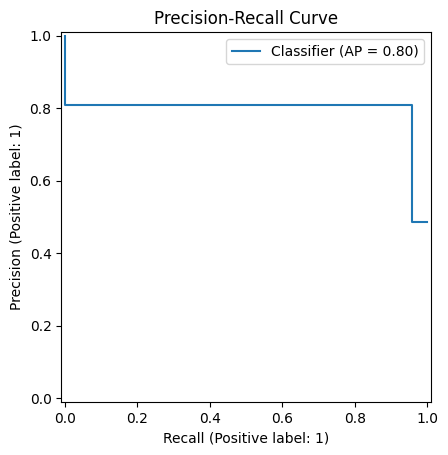

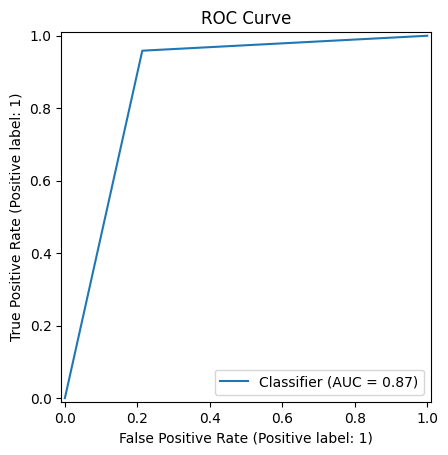

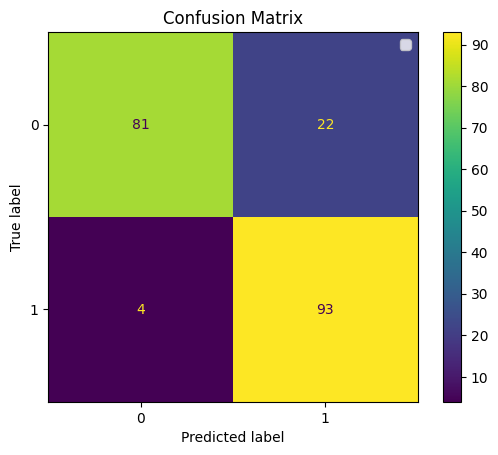

In [76]:
with mlflow.start_run(run_name='log_image2',experiment_id=7) as run:
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
    model=RandomForestClassifier(max_depth=3).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    fig_pr=plt.figure()
    pr_dp=PrecisionRecallDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.title("Precision-Recall Curve")
    plt.legend()
    mlflow.log_figure(fig_pr,'Pct/pr.png')

    fig_rov=plt.figure()
    rov_dp=RocCurveDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.title("ROC Curve")
    plt.legend()
    mlflow.log_figure(fig_rov,'Pct/roc.png')

    fig_cf=plt.figure()
    cf_dp=ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.legend()
    mlflow.log_figure(fig_cf,'Pct/cf.png')
    print("run_id: {}".format(run.info.run_id))
    print("experiment_id: {}".format(run.info.experiment_id))
    print("status: {}".format(run.info.status))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("lifecycle_stage: {}".format(run.info.lifecycle_stage))
    

In [79]:
with mlflow.start_run(run_name='log_model2',experiment_id=7) as run:
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
    #mlflow.autolog()
    X_train = pd.DataFrame(X_train, columns=["feature_{}".format(i) for i in range(10)])
    X_test = pd.DataFrame(X_test, columns=["feature_{}".format(i) for i in range(10)])
    y_train = pd.DataFrame(y_train, columns=["target"])
    y_test = pd.DataFrame(y_test, columns=["target"])

    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=["prediction"])
    #model=RandomForestClassifier(max_depth=3).fit(X_train,y_train)
    #y_pred=model.predict(X_test)
    mlflow.sklearn.log_model(sk_model=model,artifact_path='rfc')
    
    print("run_id: {}".format(run.info.run_id))
    print("experiment_id: {}".format(run.info.experiment_id))
    print("status: {}".format(run.info.status))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

run_id: f330b3145411426e857de9a60e03b147
experiment_id: 7
status: RUNNING
start_time: 1707260715973
end_time: None
lifecycle_stage: active


In [74]:
run_id='1ef0f503c6f74dbfb65422788410de44'

In [73]:
test_X.shape

(200, 10)

In [75]:
model_url=f'runs:/{run_id}/model'
my_model=mlflow.sklearn.load_model(model_uri=model_url)

In [76]:
y_pred=my_model.predict(test_X)

In [47]:
import pandas as pd

In [87]:
#with mlflow.start_run(run_name='log_infer1',experiment_id=7) as run:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
#mlflow.autolog()
X_train = pd.DataFrame(X_train, columns=["feature_{}".format(i) for i in range(10)])
X_test = pd.DataFrame(X_test, columns=["feature_{}".format(i) for i in range(10)])
y_train = pd.DataFrame(y_train, columns=["target"])
y_test = pd.DataFrame(y_test, columns=["target"])
model_url=f'runs:/{run_id}/rfc'
rfc=mlflow.sklearn.load_model(model_uri=model_url)
y_pred=rfc.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=["prediction"])

print(y_pred.head())


    
    
    
    

/home/gyang/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gyang/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
2024/02/06 18:51:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/gyang/.local/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


   prediction
0           0
1           0
2           0
3           1
4           0


In [88]:
experiment_id=mlflow.create_experiment(
    name='mlflow_test8',
    artifact_location='mlflow-artifacts:/0')

In [89]:
print(experiment_id)

8


In [22]:
with mlflow.start_run(run_name='parent2',experiment_id=model_id) as run:
    print("RUN ID parent:", run.info.run_id)

    mlflow.log_param("parent_param", "parent_value")
    with mlflow.start_run(run_name='child1',nested=True,experiment_id=model_id) as child1:
        print("RUN ID child1:", child1.info.run_id)
        mlflow.log_param("child1_param", "child1_value")
        with mlflow.start_run(run_name="child_11",nested=True,experiment_id=model_id) as child_11:
            print("RUN ID child_11:", child_11.info.run_id )
            mlflow.log_param("child_11_param", "child_11_value")
    with mlflow.start_run(run_name='child2',nested=True,experiment_id=model_id) as child2:
        print("RUN ID child2:", child2.info.run_id)
        mlflow.log_param("child2_param", "child2_value")
    

RUN ID parent: 842e207b94b146eeb069d1fd2d91ce6b
RUN ID child1: d8af3dadcd724852bc81d12396bb260f
RUN ID child_11: d3513a90c8eb4c4ba2fbbb1fed84fd6b
RUN ID child2: d8bba7d372d44af0b85030a8e8adbc32


In [32]:
class CustomModel(mlflow.pyfunc.PythonModel):

    def __init__(self):
        pass 

    def fit(self):
        print("Fitting model...")

    def predict(self,context,model_input:[str]):
        return self.get_prediction(model_input)
    
    def get_prediction(self, model_input:[str]):
        # do something with the model input
        return " ".join([w.upper() for w in model_input])
    


In [23]:
custom_id=mlflow.create_experiment(name='custom_model1',
                                  artifact_location='mlflow-artifacts:/0')

In [35]:
with mlflow.start_run(run_name='customer model',experiment_id=custom_id) as run:
    cmodel=CustomModel()
    cmodel.fit()
    mlflow.pyfunc.log_model(python_model=cmodel,artifact_path='custom')
    mlflow.log_param('test','cmodel')
    my_model=mlflow.pyfunc.load_model(f'runs:/{run.info.run_id}/custom')
    pred=my_model.predict(['hello'])
    
    print(pred)
    

2025/02/09 21:29:57 INFO mlflow.types.utils: Unsupported type hint: [<class 'str'>], skipping schema inference


Fitting model...


/home/gyang/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

HELLO


In [80]:
from mlflow.models.signature import ModelSignature,infer_signature

In [81]:
from mlflow.types.schema import Schema,ParamSchema,ParamSpec,ColSpec

In [82]:
def get_train_data():
    """
    Generate train and test data.

    :return: x_train,y_train
    """
    x, y = make_classification()
    features = [f"feature_{i+1}" for i in range(x.shape[1])]
    df = pd.DataFrame(x, columns=features)
    df["label"] = y

    return df[features], df["label"]

In [83]:
x_train, y_train = get_train_data()
cols_spec = []
data_map = {
    'int64': 'integer',
    'float64': 'double',
    'bool': 'boolean',
    'str': 'string',
    "date": 'datetime'
}


In [84]:
for name,dtype in x_train.dtypes.to_dict().items():
    cols_spec.append(ColSpec(name=name,type=data_map[str(dtype)]))
input_schema = Schema(inputs=cols_spec)
output_schema = Schema([ColSpec(name='lable',type='integer')])

parameter = ParamSpec(name='model_name',dtype='string',default='model1')
param_schema = ParamSchema(params=[parameter])

model_signature = ModelSignature(inputs=input_schema,outputs=output_schema,params=param_schema)
print("MODEL SIGNATURE")
print(model_signature.to_dict())



MODEL SIGNATURE
{'inputs': '[{"type": "double", "name": "feature_1"}, {"type": "double", "name": "feature_2"}, {"type": "double", "name": "feature_3"}, {"type": "double", "name": "feature_4"}, {"type": "double", "name": "feature_5"}, {"type": "double", "name": "feature_6"}, {"type": "double", "name": "feature_7"}, {"type": "double", "name": "feature_8"}, {"type": "double", "name": "feature_9"}, {"type": "double", "name": "feature_10"}, {"type": "double", "name": "feature_11"}, {"type": "double", "name": "feature_12"}, {"type": "double", "name": "feature_13"}, {"type": "double", "name": "feature_14"}, {"type": "double", "name": "feature_15"}, {"type": "double", "name": "feature_16"}, {"type": "double", "name": "feature_17"}, {"type": "double", "name": "feature_18"}, {"type": "double", "name": "feature_19"}, {"type": "double", "name": "feature_20"}]', 'outputs': '[{"type": "integer", "name": "lable"}]', 'params': '[{"name": "model_name", "type": "string", "default": "model1", "shape": nu

In [85]:
model_signature=infer_signature(x_train,y_train,params={'model_name':'model2'})

/home/gyang/.local/lib/python3.10/site-packages/mlflow/models/signature.py:213: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  outputs = _infer_schema(model_output) if model_output is not None else None


In [86]:
with mlflow.start_run(run_name="model_signature_run",experiment_id=model_id) as run:
        mlflow.sklearn.log_model(
            sk_model=RandomForestClassifier(),
            artifact_path="model_signature",
            signature=model_signature,
        )

/home/gyang/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/gyang/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [51]:
import numpy as np


class CustomModel(mlflow.pyfunc.PythonModel):
    def predict_model1(self, model_input):
        # do some processing for model 1
        return 0 * model_input

    def predict_model2(self, model_input):
        # do some processing for model 2
        return model_input

    def predict_model3(self, model_input):
        # do some processing for model 3
        return 2 * model_input

    def predict(self, context, model_input, params):
        if params["model_name"] == "model_1":
            return self.predict_model1(model_input=model_input)

        elif params["model_name"] == "model_2":
            return self.predict_model2(model_input=model_input)

        elif params["model_name"] == "model_3":
            return self.predict_model3(model_input=model_input)

        else:
            raise Exception("Model Not Found!")



In [52]:
input_schema = Schema(inputs=[ColSpec(type="integer", name="input")])
output_schema = Schema(inputs=[ColSpec(type="integer", name="output")])
param_spec=ParamSpec(name='model_name',dtype='string',default=None)
param_schema=ParamSchema(params=[param_spec])
model_signature=ModelSignature(inputs=input_schema,outputs=output_schema,params=param_schema)

In [57]:
with mlflow.start_run(run_name="mutiple_model_signature",experiment_id=model_id) as run:
    mlflow.pyfunc.log_model(python_model=CustomModel(),
                            artifact_path='mutiple_model_signature',
                            signature=model_signature)
    model_uri=f'runs:/{run.info.run_id}/mutiple_model_signature'
    my_model=mlflow.pyfunc.load_model(model_uri)
    for i in range(3):
        print(my_model.predict(data={"input":np.int32(10)},params={'model_name':f'model_{i+1}'}))

   input
0      0
   input
0     10
   input
0     20


/home/gyang/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/gyang/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
with mlflow.start_run(run_name="registered_model",experiment_id=model_id) as run:
    mlflow.pyfunc.log_model(python_model=CustomModel(),artifact_path='model_registered1',registered_model_name='custom')
    mlflow.sklearn.log_model(
            sk_model=RandomForestClassifier(),
            artifact_path="model_registered2",registered_model_name='rf_classification'

        )
    mlflow.sklearn.log_model(sk_model=RandomForestRegressor(),artifact_path='model')
    #my_model=mlflow.pyfunc.load_model(model_uri=f"runs:/{run.info.run_id}/model_signature")

/home/gyang/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/gyang/miniconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'custom'.
2025/02/10 10:44:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: custom, version 1
Created version '1' of model 'custom'.
Successfully registered model 'rf_classification'.
2025/02/10 10:44:03 INF

In [61]:
from mlflow import MlflowClient

In [62]:
client=MlflowClient()
model_name = "registered_model_1"

In [63]:
client.create_registered_model(model_name)

<RegisteredModel: aliases={}, creation_timestamp=1739217838516, description='', last_updated_timestamp=1739217838516, latest_versions=[], name='registered_model_1', tags={}>

In [67]:
source='runs:/90fc24ea98e74e56847b68b0dc795835/model'
run_id='90fc24ea98e74e56847b68b0dc795835'
client.create_model_version(name=model_name,source=source,run_id=run_id)

2025/02/10 14:27:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: registered_model_1, version 2


<ModelVersion: aliases=[], creation_timestamp=1739219273274, current_stage='None', description='', last_updated_timestamp=1739219273274, name='registered_model_1', run_id='90fc24ea98e74e56847b68b0dc795835', run_link='', source='runs:/90fc24ea98e74e56847b68b0dc795835/model', status='READY', status_message='', tags={}, user_id='', version='2'>

In [68]:
client.transition_model_version_stage(name=model_name,version=1,stage='Archived')

<ModelVersion: aliases=[], creation_timestamp=1739219023754, current_stage='Archived', description='', last_updated_timestamp=1739219443679, name='registered_model_1', run_id='90fc24ea98e74e56847b68b0dc795835', run_link='', source='runs:/90fc24ea98e74e56847b68b0dc795835/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [69]:
client.delete_model_version(name=model_name,version=1)

In [133]:
client.delete_registered_model(name=model_name)

In [70]:
client.update_registered_model(name='rf_classification',description='This is the test model')

<RegisteredModel: aliases={}, creation_timestamp=1739205843396, description='This is the test model', last_updated_timestamp=1739220291642, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1739216804656, current_stage='None', description='', last_updated_timestamp=1739216804656, name='rf_classification', run_id='90fc24ea98e74e56847b68b0dc795835', run_link='', source='/home/gyang/Documents/airflow_docker/model2/90fc24ea98e74e56847b68b0dc795835/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='2'>], name='rf_classification', tags={}>

In [73]:
client.set_registered_model_tag(name='rf_classification',key='key',value='l')

In [71]:
client.update_model_version(name='rf_classification',version=1,description='This is the test model')

<ModelVersion: aliases=[], creation_timestamp=1739205843414, current_stage='None', description='This is the test model', last_updated_timestamp=1739220479819, name='rf_classification', run_id='90fc24ea98e74e56847b68b0dc795835', run_link='', source='/home/gyang/Documents/airflow_docker/model2/90fc24ea98e74e56847b68b0dc795835/artifacts/model_registered2', status='READY', status_message='', tags={}, user_id='', version='1'>

## Project

In [74]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import mlflow

/home/gyang/miniconda3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/gyang/miniconda3/lib/python3.10/site-packages/pydantic/_internal/_config.py:321: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [75]:
def load_data() -> pd.DataFrame:
    """
    Download the California housing dataset and return it as a pandas dataframe.

    :return: California housing dataset as a pandas dataframe.
    """
    #cur_directory_path = os.path.abspath(os.path.dirname(__file__))
    data = fetch_california_housing(
        data_home='./data', as_frame=True, download_if_missing=True
    )
    return data.frame


def get_feature_dataframe() -> pd.DataFrame:
    """
    Get the feature dataframe.

    :return: Feature dataframe.
    """
    df = load_data()
    df["id"] = df.index
    df["target"] = df["MedHouseVal"] >= df["MedHouseVal"].median()
    df["target"] = df["target"].astype(int)
 
    return df

In [76]:
experiment_name = "house_pricing_classifier2"
run_name = "training_classifier"
model_name = "registered_model"
artifact_path = "model"
df = get_feature_dataframe()

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,id,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4,1


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#from sklearn.ensemble import RandomForestClassifier

In [150]:
from sklearn.preprocessing import Normalizer

In [151]:
ct = ColumnTransformer(
...     [("norm1", Normalizer(norm='l1'), [0, 1]),
...      ("norm2", Normalizer(norm='l1'), slice(2, 4))])

In [153]:
 x=np.array([[0., 1., 2., 2.],
...               [1., 1., 0., 1.]])

In [1]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
dat

NameError: name 'ct' is not defined

In [78]:
def get_pipeline(num_features,cat_features):
    transformer=ColumnTransformer([
     ("numerical_imputer", SimpleImputer(strategy="median"), num_features),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"),cat_features)])
    pipeline=Pipeline([('transformer',transformer),('classifier',XGBClassifier())])
    return pipeline

In [ ]:
def get_pipeline(num_features,X

In [79]:
from typing import List
from typing import Tuple
from sklearn.model_selection import train_test_split

In [87]:
def get_train_test_score_set(df: pd.DataFrame) -> Tuple:
    """
    Get training and testing sets.

    :param df: Dataframe.
    :return: Training, testing and validation dataframes.
    """
    x_train, x_test, y_train, y_test = train_test_split(
        df.drop("target", axis=1), df["target"], test_size=0.3, random_state=42
    )
    x_test, x_score, y_test, y_score = train_test_split(
        x_test, y_test, test_size=0.5, random_state=42
    )

    return x_train, x_test, x_score, y_train, y_test, y_score

In [88]:
from mlflow.models.signature import ModelSignature,infer_signature

In [91]:
exp_id=mlflow.create_experiment(name=experiment_name,
                                artifact_location=artifact_path)
                                

In [14]:
print(experiment_id)

165262957078029638


In [62]:
mlflow.xgboost.autolog()


2024/02/24 16:13:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.


In [63]:
import xgboost

In [64]:
from xgboost import XGBClassifier

In [15]:
def train_model(pipeline:Pipeline,experiment_id:int,run_name:str,model_name:str,artifact_path:str,x:pd.DataFrame,y:pd.DataFrame)->Tuple[str,Pipeline]:
    signature=infer_signature(x,y)
    with mlflow.start_run(run_name=run_name,experiment_id=experiment_id) as run:
        pipeline=pipeline.fit(x,y)
        mlflow.sklearn.log_model(sk_model=pipeline,artifact_path=artifact_path,signature=signature,registered_model_name=model_name)
    return run.info,run.info.run_id,pipeline
        
        
        
    

In [16]:
x_train, x_test, x_score, y_train, y_test, y_score=get_train_test_score_set(df)


In [17]:
experiment_name = "house_pricing_classifier"
run_name = "training_classifier"
model_name = "registered_model"
artifact_path = "model"

In [18]:
experiment_id=mlflow.create_experiment(name=experiment_name,artifact_location='mlflow-artifacts:/0')
print(experiment_id)

561057041556834502


In [19]:
features = [f for f in x_train.columns if f not in ["id", "target", "MedHouseVal"]]

In [65]:
pipeline=get_pipeline(features,[])

In [66]:
run_info,run_id,model=train_model(pipeline,experiment_id,run_name,model_name,artifact_path,x_train[features],y_train)

/home/gyang/.local/lib/python3.10/site-packages/mlflow/models/signature.py:213: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  outputs = _infer_schema(model_output) if model_output is not None else None
2024/02/24 16:19:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/gyang/miniconda3/lib/python3.10/site-packages/xgboost/core.py:160

In [49]:
run_id


'88787a4b292541fd8177325221b34617'

In [70]:
run_id

'93c0b62fb74d40638d9f362860a773d7'

In [67]:
house_model=mlflow.sklearn.load_model(model_uri=f"runs:/{run_id}/{artifact_path}")

In [68]:
predictions=house_model.predict(x_score[features])

In [24]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_score,predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1564
           1       0.90      0.92      0.91      1532

    accuracy                           0.91      3096
   macro avg       0.91      0.91      0.91      3096
weighted avg       0.91      0.91      0.91      3096



In [25]:
print(classification_report(y_score,predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1564
           1       0.90      0.89      0.90      1532

    accuracy                           0.90      3096
   macro avg       0.90      0.90      0.90      3096
weighted avg       0.90      0.90      0.90      3096



In [30]:
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay,PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score,precision_score,accuracy_score,recall_score,f1_score

import matplotlib.pyplot as plt

In [45]:
def get_performance_plots(y_pre,y_score,prefix):
    fig_pr=plt.figure()
    pr_dp=PrecisionRecallDisplay.from_predictions(y_score,y_pre,ax=plt.gca())
    fig_rc=plt.figure()
    rc_dp=RocCurveDisplay.from_predictions(y_score,y_pre,ax=plt.gca())
    fig_cm=plt.figure()
    cm_dp=ConfusionMatrixDisplay.from_predictions(y_score,y_pre,ax=plt.gca())
    return {
        f"{prefix}_roc_curve": fig_rc,
        f"{prefix}_confusion_matrix": fig_cm,
        f"{prefix}_precision_recall_curve": fig_pr,
    }

    
    

In [40]:
def get_performance_matrix(y_pre,y_true,prefix):
    metrics = {
        f"{prefix}_accuracy": accuracy_score(y_true, y_pre),
        f"{prefix}_precision": precision_score(y_true, y_pre),
        f"{prefix}_recall": recall_score(y_true, y_pre),
        f"{prefix}_f1": f1_score(y_true, y_pre),
        f"{prefix}_roc_auc": roc_auc_score(y_true, y_pre)
    }

    return metrics

In [32]:
from mlflow import MlflowClient

In [51]:
def register_model_with_client(model_name,run_id,artifact_path):
    client=MlflowClient()
    client.create_registered_model(model_name)
    client.create_model_version(name=model_name,source=f"runs:/{run_id}/{artifact_path}")
    
    

In [71]:
met=get_performance_matrix(predictions,y_score,'test')

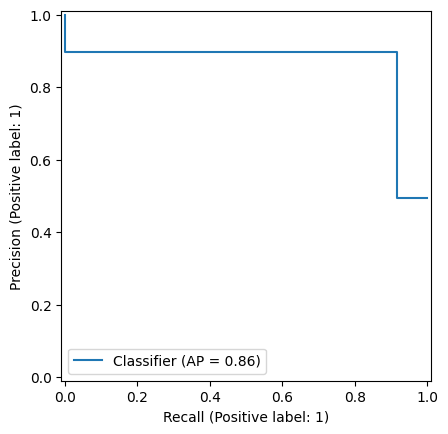

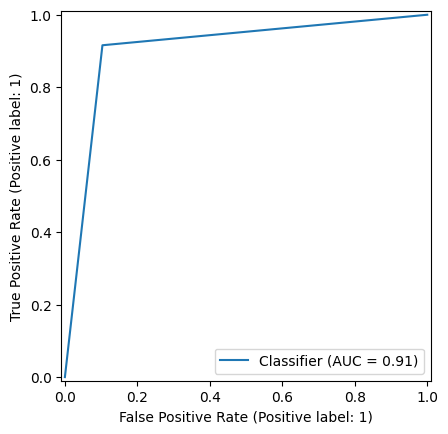

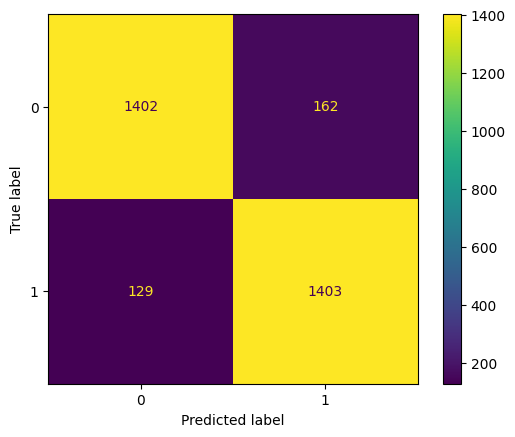

In [72]:
plot=get_performance_plots(predictions,y_score,'test')

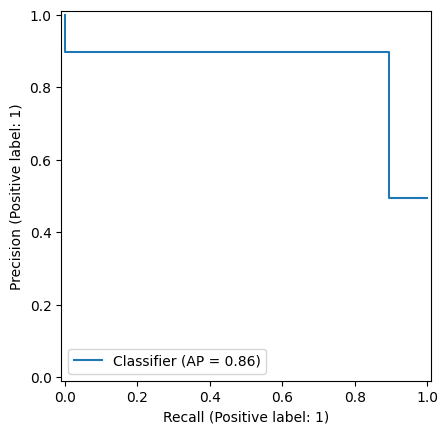

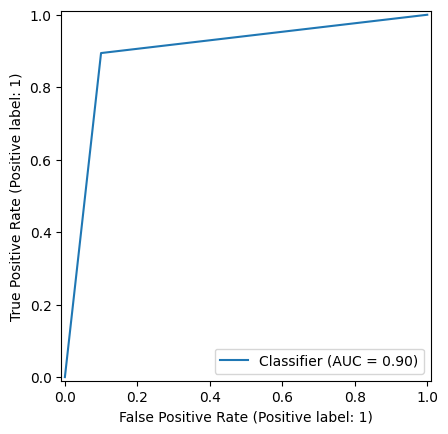

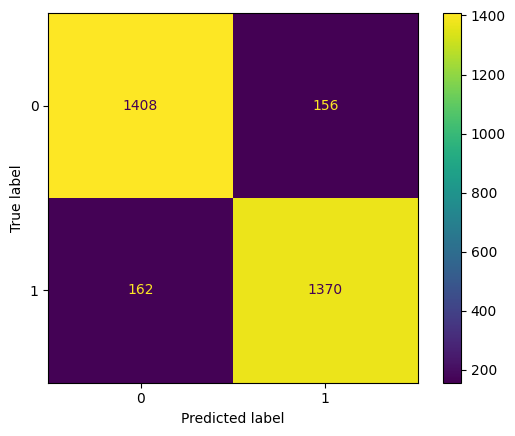

In [46]:
plot=get_performance_plots(predictions,y_score,'test')

In [73]:
with mlflow.start_run(run_id=run_id) as run:
    mlflow.log_metrics(met)
    mlflow.log_params(model[-1].get_params())
    mlflow.set_tags({"type": "classifier"})

        # log description
    mlflow.set_tag("mlflow.note.content", "This is a classifier for the house pricing dataset")
    for name,pl in plot.items():
        mlflow.log_figure(pl,name+'.png')

In [77]:
latest_house_model=mlflow.sklearn.load_model(model_uri='models:/registered_model/1')

In [78]:
house_predictions =latest_house_model.predict(x_score[features])


In [79]:
print(classification_report(y_score,house_predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1564
           1       0.90      0.89      0.90      1532

    accuracy                           0.90      3096
   macro avg       0.90      0.90      0.90      3096
weighted avg       0.90      0.90      0.90      3096



In [84]:
import json,requests

In [81]:
feature_values = json.loads(x_score[features].iloc[1:2].to_json(orient="split"))

In [82]:
payload = {"dataframe_split": feature_values}

In [85]:
BASE_URI = "http://127.0.0.1:5000/"
headers = {"Content-Type": "application/json"}
endpoint = BASE_URI + "invocations"
r = requests.post(endpoint, data=json.dumps(payload), headers=headers)

In [87]:
print(f"STATUS CODE: {r.status_code}")
print(f"PREDICTIONS: {r.text}")
print(f"TARGET: {y_score.iloc[1:2]}")

STATUS CODE: 404
PREDICTIONS: <!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>

TARGET: 12273    0
Name: target, dtype: int64
